Shortest path from 1st Avenue to 14th Avenue: ['1st Avenue', '2nd Avenue', '5th Avenue', '8th Avenue', '11th Avenue', '14th Avenue']


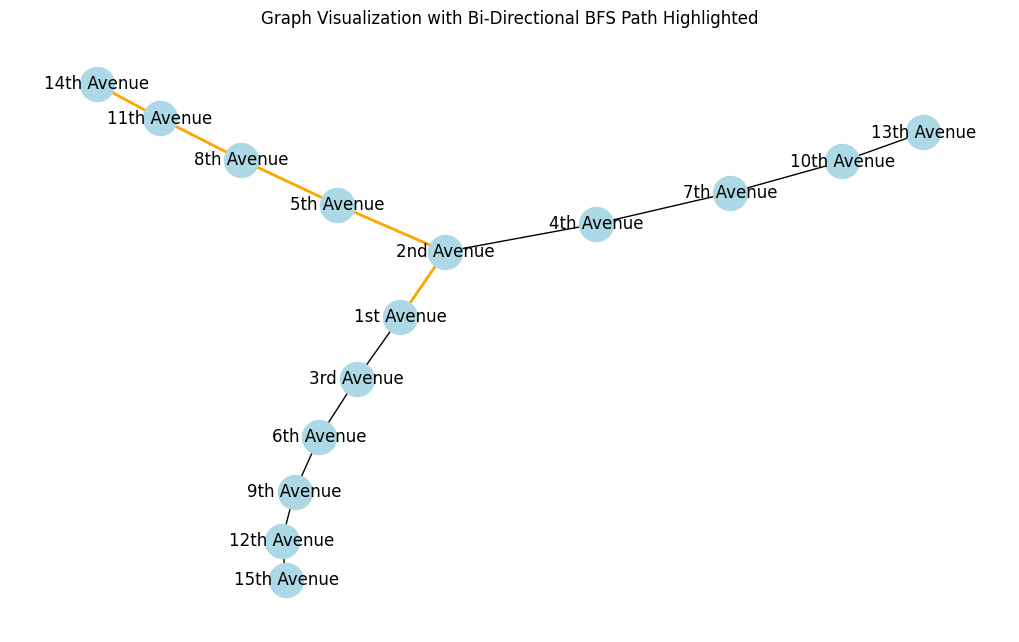

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import threading

def parallel_bi_directional_bfs(graph, start, end):
    if start == end:
        return [start]

    queue_start = deque([start])
    queue_end = deque([end])
    visited_start = {start}
    visited_end = {end}
    parent_start = {start: None}
    parent_end = {end: None}
    meeting_point = [None]
    lock = threading.Lock()

    def bfs_from_start():
        while queue_start:
            current = queue_start.popleft()
            for neighbor in graph[current]:
                with lock:
                    if neighbor not in visited_start:
                        visited_start.add(neighbor)
                        parent_start[neighbor] = current
                        queue_start.append(neighbor)
                        if neighbor in visited_end:
                            meeting_point[0] = neighbor
                            return

    def bfs_from_end():
        while queue_end:
            current = queue_end.popleft()
            for neighbor in graph[current]:
                with lock:
                    if neighbor not in visited_end:
                        visited_end.add(neighbor)
                        parent_end[neighbor] = current
                        queue_end.append(neighbor)
                        if neighbor in visited_start:
                            meeting_point[0] = neighbor
                            return

    # Create and start threads
    thread_start = threading.Thread(target=bfs_from_start)
    thread_end = threading.Thread(target=bfs_from_end)
    thread_start.start()
    thread_end.start()

    # Wait for threads to finish
    thread_start.join()
    thread_end.join()

    if meeting_point[0] is not None:
        return reconstruct_path(parent_start, parent_end, meeting_point[0])
    return "No path found"

def reconstruct_path(parent_start, parent_end, meeting_point):
    path_start = []
    current = meeting_point
    while current is not None:
        path_start.append(current)
        current = parent_start[current]
    path_start.reverse()

    path_end = []
    current = parent_end[meeting_point]
    while current is not None:
        path_end.append(current)
        current = parent_end[current]

    return path_start + path_end

def create_city_graph():
    G = nx.Graph()
    edges = [
        ('1st Avenue', '2nd Avenue'),
        ('1st Avenue', '3rd Avenue'),
        ('2nd Avenue', '4th Avenue'),
        ('2nd Avenue', '5th Avenue'),
        ('3rd Avenue', '6th Avenue'),
        ('4th Avenue', '7th Avenue'),
        ('5th Avenue', '8th Avenue'),
        ('6th Avenue', '9th Avenue'),
        ('7th Avenue', '10th Avenue'),
        ('8th Avenue', '11th Avenue'),
        ('9th Avenue', '12th Avenue'),
        ('10th Avenue', '13th Avenue'),
        ('11th Avenue', '14th Avenue'),
        ('12th Avenue', '15th Avenue')
    ]
    G.add_edges_from(edges)
    return G

def visualize_graph(graph, path=None):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=12)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='orange', width=2)

    plt.title("Graph Visualization with Bi-Directional BFS Path Highlighted")
    plt.show()

if __name__ == "__main__":
    city_graph = create_city_graph()
    start_node = '1st Avenue'
    end_node = '14th Avenue'

    shortest_path = parallel_bi_directional_bfs(city_graph, start_node, end_node)
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")

    visualize_graph(city_graph, shortest_path)
